In [89]:
import numpy as np

In [90]:
class Linear_Regression():
  # initialising the parameters learning rate and the number of iterations
  def __init__(self, learning_rate, no_of_iterations):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
  
  def fit(self, X, Y):
    # m = no of training examples and n = number of features
    self.m, self.n = X.shape #no of rows and columns of data X

    # Initialising the weight(theta_one in my note by andrew ng), bias(theta_not in my note by andrew ng)
    self.w = np.zeros(self.n) #creating an array of zeros, number of elements = no of features
    self.b = 0
    self.X = X
    self.Y = Y
     
    #  implementing the gradient descent
    for i in range(self.no_of_iterations):
      self.update_weights()

  def update_weights(self, ):
    Y_predicted = self.predict(self.X)
    # calculating the gradients...
    dw = (self.X.T).dot(Y_predicted - self.Y)/self.m
    db = np.sum(Y_predicted - self.Y)/self.m
    #updating the weights...
    self.w = self.w - self.learning_rate * dw
    self.b = self.b - self.learning_rate * db

  def predict(self, X):
    # implementing the Y = w.X + b formula, where w is the weight vector, X is the feature matrix and b is the bias
    return X.dot(self.w) + self.b




## Using Linear Regression Model for prediction

In [91]:
#importing the depnedencies
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [92]:
# loading the data from csv file to the pandas dataframe
salary = pd.read_csv('/content/salary_data.csv')

In [93]:
# printing the first five rows of the dataframe
salary.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [94]:
# printing the last five rows of the dataframe
salary.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [95]:
# number of rows and columns in the dataframe
salary.shape

(30, 2)

In [96]:
# checking for missing values
salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

Splitting the feature and Target


In [97]:
X = salary.iloc[:,:-1].values
Y = salary.iloc[:,1:].values

Spliting the data into trainning and test set

In [98]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=10, test_size=0.3)

Training the Linear Regression Model

In [99]:
linear_reg = Linear_Regression(learning_rate=0.02, no_of_iterations=1000)

In [100]:
linear_reg.fit(X_train, Y_train)

In [101]:
# printing the weight and bias values (theta_one and theta_not)
print('weight(theta_one = ', linear_reg.w[0],'\n bias(theta_not = ', linear_reg.b)

weight(theta_one =  [9303.95933197 9303.95933197 9303.95933197 9303.95933197 9303.95933197
 9303.95933197 9303.95933197 9303.95933197 9303.95933197 9303.95933197
 9303.95933197 9303.95933197 9303.95933197 9303.95933197 9303.95933197
 9303.95933197 9303.95933197 9303.95933197 9303.95933197 9303.95933197
 9303.95933197] 
 bias(theta_not =  27206.4289029286


Predicting the salary value for test data

In [102]:
test_data_prediction = linear_reg.predict(X_test)

In [103]:
print(test_data_prediction)

[[ 90473.3523603   90473.3523603   90473.3523603   90473.3523603
   90473.3523603   90473.3523603   90473.3523603   90473.3523603
   90473.3523603   90473.3523603   90473.3523603   90473.3523603
   90473.3523603   90473.3523603   90473.3523603   90473.3523603
   90473.3523603   90473.3523603   90473.3523603   90473.3523603
   90473.3523603 ]
 [ 56979.09876522  56979.09876522  56979.09876522  56979.09876522
   56979.09876522  56979.09876522  56979.09876522  56979.09876522
   56979.09876522  56979.09876522  56979.09876522  56979.09876522
   56979.09876522  56979.09876522  56979.09876522  56979.09876522
   56979.09876522  56979.09876522  56979.09876522  56979.09876522
   56979.09876522]
 [ 54187.91096563  54187.91096563  54187.91096563  54187.91096563
   54187.91096563  54187.91096563  54187.91096563  54187.91096563
   54187.91096563  54187.91096563  54187.91096563  54187.91096563
   54187.91096563  54187.91096563  54187.91096563  54187.91096563
   54187.91096563  54187.91096563  54187.91

Visualizing the true and predicted values

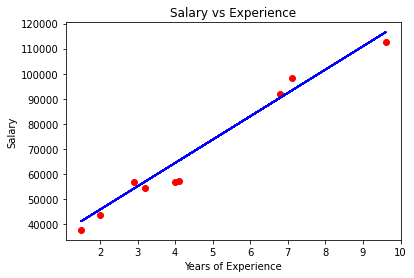

In [108]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, test_data_prediction, color = 'blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show()